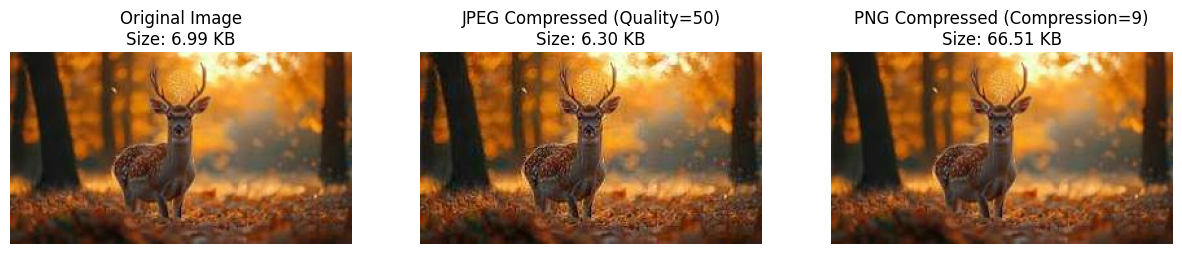

In [4]:
#TASK 1
import cv2
import os
import matplotlib.pyplot as plt

image_path = "deer_image.jpeg"
image = cv2.imread(image_path)

output_dir = "compressed_images"
os.makedirs(output_dir, exist_ok=True)

jpeg_quality = 50
jpeg_path = os.path.join(output_dir, "compressed_jpeg.jpg")
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])

png_compression_level = 9
png_path = os.path.join(output_dir, "compressed_png.png")
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, png_compression_level])

jpeg_image = cv2.imread(jpeg_path)
png_image = cv2.imread(png_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
jpeg_rgb = cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2RGB)
png_rgb = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

original_size = os.path.getsize(image_path) / 1024
jpeg_size = os.path.getsize(jpeg_path) / 1024
png_size = os.path.getsize(png_path) / 1024


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title(f"Original Image\nSize: {original_size:.2f} KB")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(jpeg_rgb)
plt.title(f"JPEG Compressed (Quality={jpeg_quality})\nSize: {jpeg_size:.2f} KB")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(png_rgb)
plt.title(f"PNG Compressed (Compression={png_compression_level})\nSize: {png_size:.2f} KB")
plt.axis("off")

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.8584 - loss: 0.4683 - val_accuracy: 0.9791 - val_loss: 0.0679
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9821 - loss: 0.0588 - val_accuracy: 0.9856 - val_loss: 0.0436
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9882 - val_loss: 0.0341
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9896 - val_loss: 0.0310
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9893 - val_loss: 0.0360
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9899 - val_loss: 0.0302
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.9971 - loss: 0.00

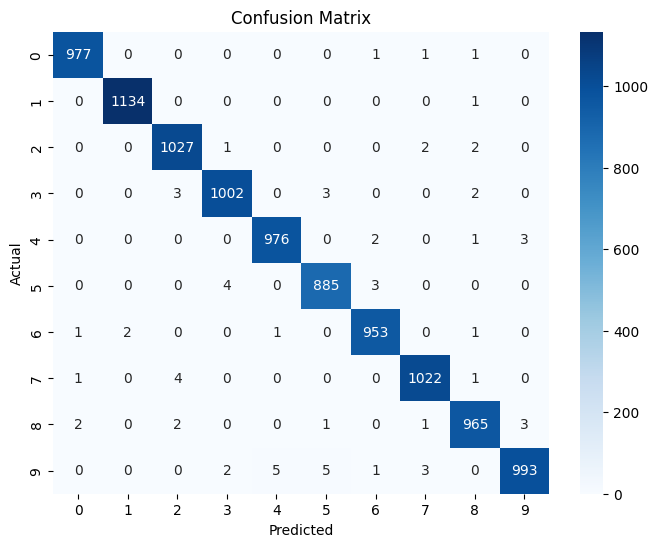

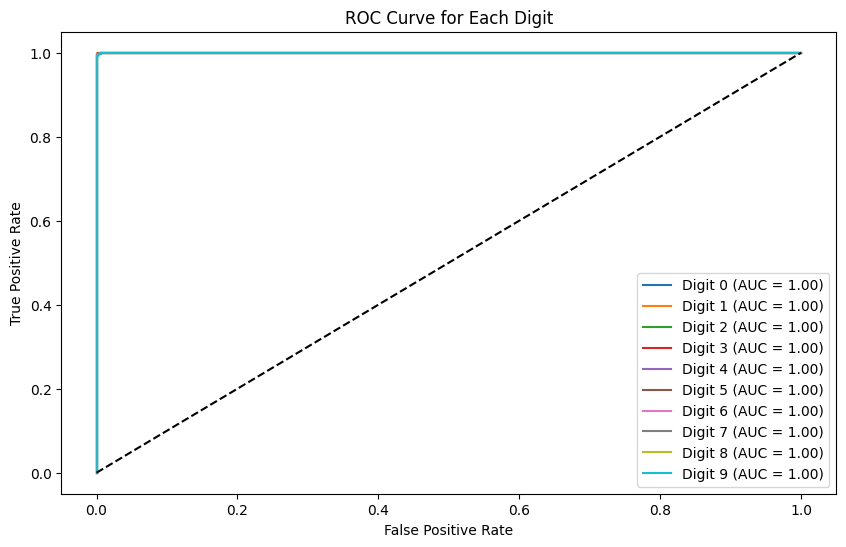

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10, batch_size=128)

test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Digit {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit")
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 254ms/step - accuracy: 0.3182 - loss: 1.8336 - val_accuracy: 0.5192 - val_loss: 1.3486
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 129s 222ms/step - accuracy: 0.5360 - loss: 1.2973 - val_accuracy: 0.5633 - val_loss: 1.2196
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 173ms/step - accuracy: 0.6007 - loss: 1.1321 - val_accuracy: 0.6341 - val_loss: 1.0510
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.6473 - loss: 1.0122 - val_accuracy: 0.6475 - val_loss: 1.0052
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.6787 - loss: 0.9216 - val_accuracy: 0.6718 - val_loss: 0.9484
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.7037 - loss: 0.8574 - val_accuracy: 0.6826 - val_loss: 0.9160
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.7288 - loss: 0.7868 - val_accuracy: 0.6920 - val_loss: 0.9091
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.7403 - loss

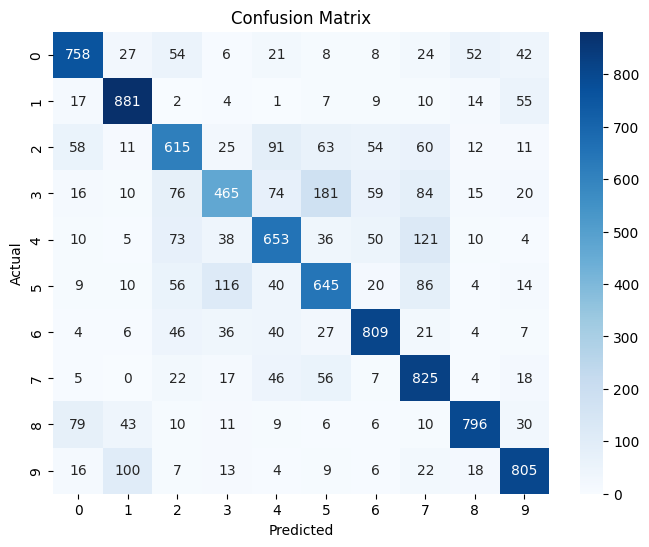

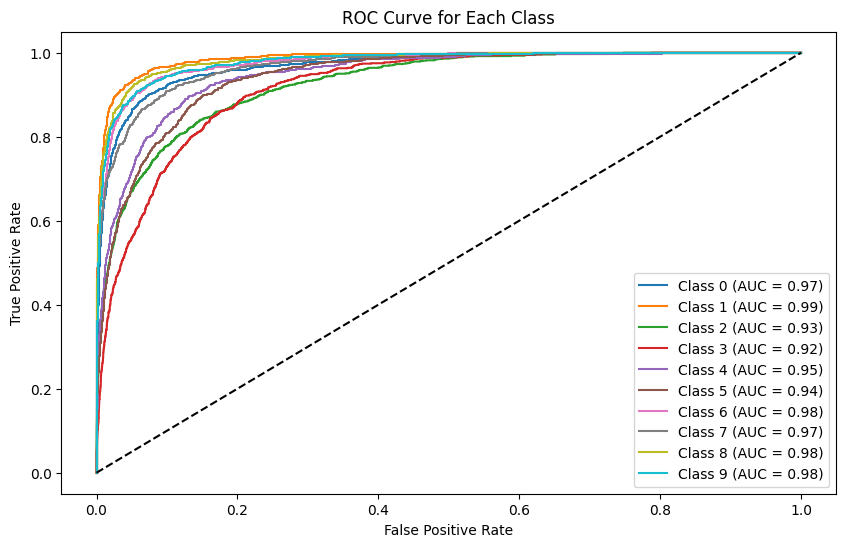

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10, batch_size=128)

test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()
